# CESAR SCHOOL 2018.1/5: EQUIPE B (COI)

In [ ]:
import pip

pip.main(['install', 'xgboost'])

## Aquisição dos Dados

**TODO**: 
- explicar a fonte e escolha da base de dados e adicionar o glossário (está no pdf)
- explicar que tivemos q alterar a base por conta das notações brasileiras vs americanas ("." por "," e vice versa), assim como editar o csv porque "," impedia q o arquivo fosse separado por virgulas e usaram ";"
- "," -> "!"; "." -> ""; "," -> "."; ";" -> ","

## Carregamento da Base de Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
data = [
    'data/SP156/dados-gerais-ligacoes-sp156-2o-sem-2019.csv',
    'data/SP156/dados-gerais-ligacoes-sp156-1o-sem-2019.csv',
    'data/SP156/dados-gerais-ligacoes-sp156-1o-sem-2020.csv',
]

df = pd.concat(map(lambda file: pd.read_csv(file), data))

## Exploração dos Dados

In [3]:
df

,Data,Quantidade de ligacoes entrantes,Quantidade de ligacoes atendidas,Quantidade de ligacoes abandonadas,Tempo Medio de Atendimento,Tempo Medio de Espera,Quantidade de ligacoes atendidas em ate 15 segundos,Quantidade de ligacoes atendidas apos 15 segundos,Nivel de servico - ate 15 segundos (%),indice de ligacoes abandonadas em ate 15 segundos (%)
0,01/07/2019,25559,22463,3089,00:04:00,00:00:29,17768,4695,79.10,3.06
1,02/07/2019,25843,21447,3928,00:04:09,00:00:53,14190,7257,66.16,5.19
2,03/07/2019,22672,21375,1217,00:04:04,00:00:08,19695,1680,92.14,0.73
3,04/07/2019,19570,19232,252,00:03:57,00:00:01,18949,283,98.53,0.07
4,05/07/2019,22086,20809,298,00:03:47,00:00:02,20421,388,98.14,0.16
...,...,...,...,...,...,...,...,...,...,...
86,27/03/2020,24659,23923,659,00:03:39,00:00:03,23699,224,99.06,1.03
87,28/03/2020,9605,9414,191,00:03:35,00:00:02,9260,154,98.36,0.69
88,29/03/2020,6000,5913,87,00:03:24,00:00:02,5824,89,98.49,0.48
89,30/03/2020,32227,31790,432,00:03:05,00:00:01,31592,198,99.38,0.17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 90
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data                                                   456 non-null    object 
 1   Quantidade de ligacoes entrantes                       456 non-null    int64  
 2   Quantidade de ligacoes atendidas                       456 non-null    int64  
 3   Quantidade de ligacoes abandonadas                     456 non-null    int64  
 4   Tempo Medio de Atendimento                             456 non-null    object 
 5   Tempo Medio de Espera                                  456 non-null    object 
 6   Quantidade de ligacoes atendidas em ate 15 segundos    456 non-null    int64  
 7   Quantidade de ligacoes atendidas apos 15 segundos      456 non-null    int64  
 8   Nivel de servico -  ate 15 segundos (%)            

In [5]:
df.head()

,Data,Quantidade de ligacoes entrantes,Quantidade de ligacoes atendidas,Quantidade de ligacoes abandonadas,Tempo Medio de Atendimento,Tempo Medio de Espera,Quantidade de ligacoes atendidas em ate 15 segundos,Quantidade de ligacoes atendidas apos 15 segundos,Nivel de servico - ate 15 segundos (%),indice de ligacoes abandonadas em ate 15 segundos (%)
0,01/07/2019,25559,22463,3089,00:04:00,00:00:29,17768,4695,79.10,3.06
1,02/07/2019,25843,21447,3928,00:04:09,00:00:53,14190,7257,66.16,5.19
2,03/07/2019,22672,21375,1217,00:04:04,00:00:08,19695,1680,92.14,0.73
3,04/07/2019,19570,19232,252,00:03:57,00:00:01,18949,283,98.53,0.07
4,05/07/2019,22086,20809,298,00:03:47,00:00:02,20421,388,98.14,0.16


In [6]:
df.describe()

,Quantidade de ligacoes entrantes,Quantidade de ligacoes atendidas,Quantidade de ligacoes abandonadas,Quantidade de ligacoes atendidas em ate 15 segundos,Quantidade de ligacoes atendidas apos 15 segundos,Nivel de servico - ate 15 segundos (%),indice de ligacoes abandonadas em ate 15 segundos (%)
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,21133.276316,17909.712719,1563.697368,15933.486842,1976.225877,90.449232,3.034627
std,11031.618824,8357.443339,2109.176258,7343.746413,2430.039146,9.338576,3.424323
min,3635.000000,2721.000000,6.000000,2153.000000,1.000000,49.830000,0.000000
25%,8377.250000,7957.500000,239.500000,7763.750000,319.750000,86.890000,0.970000
50%,23808.000000,20804.500000,801.000000,17887.000000,1040.500000,93.300000,1.870000
75%,28938.000000,24188.250000,2161.000000,21610.500000,2619.000000,97.317500,3.830000
max,54436.000000,34481.000000,19916.000000,32047.000000,14124.000000,99.990000,30.140000


## Tratamento dos Dados

**Converter campos de data (tipo objeto) em segundos (tipo int)**

In [7]:
df_1 = pd.read_csv('data/SP156/dados-gerais-ligacoes-sp156-segundos.csv')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data                                                   456 non-null    object 
 1   Quantidade de ligacoes entrantes                       456 non-null    int64  
 2   Quantidade de ligacoes atendidas                       456 non-null    int64  
 3   Quantidade de ligacoes abandonadas                     456 non-null    int64  
 4   Tempo Medio de Atendimento                             456 non-null    int64  
 5   Tempo Medio de Espera                                  456 non-null    int64  
 6   Quantidade de ligacoes atendidas em ate 15 segundos    456 non-null    int64  
 7   Quantidade de ligacoes atendidas apos 15 segundos      456 non-null    int64  
 8   Nivel de servico -  ate 15 segundos (%)           

**Dropamos _'Data'_ por não ter relevância no nosso contexto.**

In [8]:
df_2 = df_1
df_2 = df_2.drop(['Data'], axis=1)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Quantidade de ligacoes entrantes                       456 non-null    int64  
 1   Quantidade de ligacoes atendidas                       456 non-null    int64  
 2   Quantidade de ligacoes abandonadas                     456 non-null    int64  
 3   Tempo Medio de Atendimento                             456 non-null    int64  
 4   Tempo Medio de Espera                                  456 non-null    int64  
 5   Quantidade de ligacoes atendidas em ate 15 segundos    456 non-null    int64  
 6   Quantidade de ligacoes atendidas apos 15 segundos      456 non-null    int64  
 7   Nivel de servico -  ate 15 segundos (%)                456 non-null    float64
 8   indice de ligacoes abandonadas em ate 15 segundos (

## Visualização dos Dados

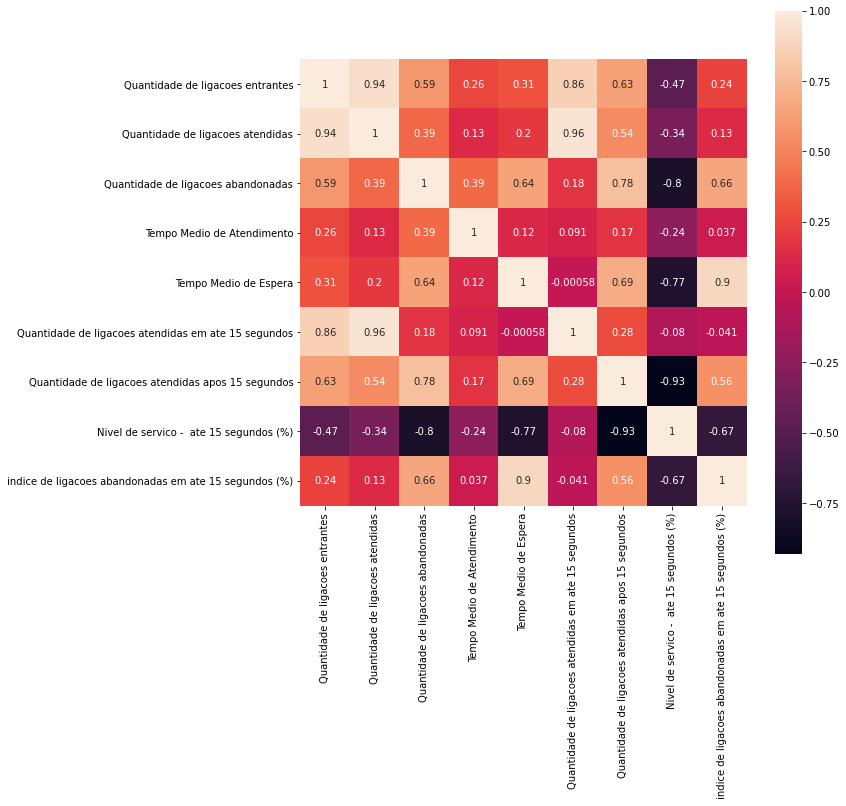

In [9]:
# correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df_2.corr(),
            annot=True,
            square=True)

**Definição das 'features' e 'target'**

In [10]:
target   = 'Quantidade de ligacoes abandonadas'
features = df_2.columns

**Divisão da base de dados**

In [11]:
from sklearn.model_selection import train_test_split

y = df_2.loc[:, features == target]
X = df_2.loc[:, features != target]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    shuffle=False)

## Aplicação dos Modelos

In [12]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV, GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor, DMatrix

import json

**Validação cruzada em series temporais**

In [13]:
tscv = TimeSeriesSplit(max_train_size=None, n_splits=10)

### KNN

**Criação do pipeline**

In [14]:
knn_pipeline = Pipeline([('scaler', StandardScaler()),
                         ('KNN', KNeighborsRegressor())])

**Ajuste de Hiperparâmetro**

In [42]:
knn_rscv_hyperparameters = {'KNN__n_neighbors': [1,2,3,4,5,6,7,9,10,12,14,16,18,20,25],
                            'KNN__weights': ['uniform', 'distance'],
                            'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                            'KNN__leaf_size': [20, 30, 40, 60, 100, 150, 200, 400, 800, 1600],
                            'KNN__p': [1, 2, 3],
                            'KNN__n_jobs': [-1]}

knn_rscv = RandomizedSearchCV(knn_pipeline,
                              n_iter=100,
                              param_distributions=knn_rscv_hyperparameters,
                              cv=tscv,
                              scoring='neg_root_mean_squared_error',
                              n_jobs=-1)

In [43]:
knn_rscv_result = knn_rscv.fit(X_train, y_train)

print("Best Score: ", knn_rscv_result.best_score_)
print("Best Parameters:\n", json.dumps(knn_rscv_result.best_params_, indent=2))

Best Score:  -901.1047702445545
Best Parameters:
 {
  "KNN__weights": "distance",
  "KNN__p": 1,
  "KNN__n_neighbors": 3,
  "KNN__n_jobs": -1,
  "KNN__leaf_size": 30,
  "KNN__algorithm": "ball_tree"
}


In [46]:
knn_gscv_hyperparameters = {'KNN__n_neighbors': [1, 3, 5, 7, 10],
                            'KNN__weights': ['uniform', 'distance'],
                            'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                            'KNN__leaf_size': [20, 30, 40],
                            'KNN__p': [1, 2, 3],
                            'KNN__n_jobs': [-1]}

knn_gscv = GridSearchCV(knn_pipeline,
                        param_grid=knn_gscv_hyperparameters,
                        cv=tscv,
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1)

In [47]:
knn_gscv_result = knn_gscv.fit(X_train, y_train)

print("Best Score: ", knn_gscv_result.best_score_)
print("Best Parameters:\n", json.dumps(knn_gscv_result.best_params_, indent=2))

Best Score:  -901.1047702445543
Best Parameters:
 {
  "KNN__algorithm": "brute",
  "KNN__leaf_size": 20,
  "KNN__n_jobs": -1,
  "KNN__n_neighbors": 3,
  "KNN__p": 1,
  "KNN__weights": "distance"
}


**Aplicação do modelo**

In [51]:
knn_best_estimator = knn_gscv_result.best_estimator_
knn_best_estimator.fit(X_train, y_train)
knn_y_pred = knn_best_estimator.predict(X_test)
knn_y_pred

array([[1462.71636803],
       [ 810.12609465],
       [  60.86367753],
       [ 106.49418787],
       [1241.27253648],
       [1885.68310421],
       [2405.33920454],
       [3657.14864568],
       [3064.40231385],
       [  45.36043321],
       [  64.68114857],
       [2966.02682684],
       [6144.38513387],
       [4538.12534754],
       [3690.08657481],
       [1840.12497989],
       [ 384.7003275 ],
       [  95.51824729],
       [3677.00340859],
       [7491.70451437],
       [2251.11375832],
       [2005.77113226],
       [1608.60433043],
       [ 151.63331408],
       [  63.78040527],
       [2039.22114535],
       [3423.89260835],
       [1575.93157457],
       [2063.41024805],
       [ 232.0224923 ],
       [  65.81488403],
       [  62.40361689],
       [2202.35897246],
       [2211.79719058],
       [1672.05798057],
       [  39.96079934],
       [ 197.13619843],
       [  41.01142994],
       [  63.15288835],
       [2754.27180366],
       [4486.91039611],
       [2249.952

### Random Forests

**Criação do Pipeline**

In [52]:
rfr_pipeline = Pipeline([('scaler', StandardScaler()),
                         ('RFR', RandomForestRegressor(random_state=42))])

**Ajuste de Hiperparâmetro**

In [58]:
rfr_rscv_hyperparameters = {'RFR__n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
                            'RFR__criterion': ['mse', 'mae'],
                            'RFR__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                            'RFR__min_samples_split': [2, 5, 10],
                            'RFR__min_samples_leaf': [1, 2, 4],
                            'RFR__max_features': ['auto', 'sqrt', 'log2'],
                            'RFR__max_leaf_nodes': [1, 5, 10, 20, 50, None],
                            'RFR__bootstrap': [True, False],
                            'RFR__warm_start': [True, False],
                            'RFR__n_jobs': [-1]}

rfr_rscv = RandomizedSearchCV(rfr_pipeline,
                              n_iter=100,
                              param_distributions=rfr_rscv_hyperparameters,
                              cv=tscv,
                              scoring='neg_root_mean_squared_error',
                              n_jobs=-1)

In [59]:
rfr_rscv_result = rfr_rscv.fit(X_train, y_train.values.ravel())

print("Best Score: ", rfr_rscv_result.best_score_)
print("Best Parameters:\n", json.dumps(rfr_rscv_result.best_params_, indent=2))

Best Score:  -825.4036080983566
Best Parameters:
 {
  "RFR__warm_start": true,
  "RFR__n_jobs": -1,
  "RFR__n_estimators": 1400,
  "RFR__min_samples_split": 2,
  "RFR__min_samples_leaf": 1,
  "RFR__max_leaf_nodes": null,
  "RFR__max_features": "auto",
  "RFR__max_depth": 80,
  "RFR__criterion": "mse",
  "RFR__bootstrap": false
}


In [60]:
rfr_gscv_hyperparameters = {'RFR__n_estimators': [1200, 1300, 1500, 1600],
                            'RFR__criterion': ['mse'],
                            'RFR__max_depth': [70, 80, 90, None],
                            'RFR__min_samples_split': [2, 5, 10],
                            'RFR__min_samples_leaf': [1, 2, 4],
                            'RFR__max_features': ['auto'],
                            'RFR__max_leaf_nodes': [5, 10, 20, None],
                            'RFR__bootstrap': [True, False],
                            'RFR__warm_start': [True, False],
                            'RFR__n_jobs': [-1]}

rfr_gscv = GridSearchCV(rfr_pipeline,
                        param_grid=rfr_gscv_hyperparameters,
                        cv=tscv,
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1)

In [ ]:
rfr_gscv_result = rfr_gscv.fit(X_train, y_train.values.ravel())

print("Best Score: ", rfr_gscv_result.best_score_)
print("Best Parameters:\n", json.dumps(rfr_gscv_result.best_params_, indent=2))

In [ ]:
rfr_best_estimator = rfr_gscv_result.best_estimator_
rfr_best_estimator.fit(X_train, y_train)
rfr_y_pred = rfr_best_estimator.predict(X_test)
rfr_y_pred

### XGBoost

**Criação do Pipeline**

In [ ]:
xgb_pipeline = Pipeline([('scaler', StandardScaler()),
                         ('XGB', XGBRegressor(seed=42))])

**Ajuste de Hiperparâmetro**

In [ ]:
xgb_rscv_hyperparameters = {
                            'XGB__n_jobs': [-1]}

xgb_rscv = GridSearchCV(xgb_pipeline,
                        n_iter=100,
                        param_distributions=xgb_rscv_hyperparameters,
                        cv=tscv,
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1)

In [ ]:
xgb_rscv_result = knn_rscv.fit(X_train, y_train)

print("Best Score: ", xgb_rscv_result.best_score_)
print("Best Parameters:\n", json.dumps(xgb_rscv_result.best_params_, indent=2))

In [ ]:
xgb_gscv_hyperparameters = {
                            'XGB__n_jobs': [-1]}

xgb_gscv = GridSearchCV(xgb_pipeline,
                        param_grid=xgb_gscv_hyperparameters,
                        cv=tscv,
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1)

In [ ]:
xgb_gscv_result = knn_gscv.fit(X_train, y_train)

print("Best Score: ", xgb_gscv_result.best_score_)
print("Best Parameters:\n", json.dumps(xgb_gscv_result.best_params_, indent=2))

In [ ]:
xgb_best_estimator = xgb_gscv_result.best_estimator_
xgb_best_estimator.fit(X_train, y_train)
xgb_y_pred = xgb_best_estimator.predict(X_test)
xgb_y_pred

## Análise Comparativa

**kNN**

**Random Forests**

**XGBoost**

**Comparativo**